In [2]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from scipy import stats
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
survey_df = pd.read_csv("CSCI_Fall_2024_survey.csv")
survey_df.columns = ['time', 'name', 'pronouns', 'origin', 'siblings', 'experience programming', 'class', 'working', 'pets', 'favorite food', 'residence', 'metro user', 'major','age', 'favorite show', 'favorite game', 'favorite book', 'reason for taking csci', 'favorite bash command']
survey_df

,time,name,pronouns,origin,siblings,experience programming,class,working,pets,favorite food,residence,metro user,major,age,favorite show,favorite game,favorite book,reason for taking csci,favorite bash command
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd



Standardize the names of places where everyone is from
Standardize the pets in some way (this one will be tricky)
Standardize the favorite food in some way (this one will also be tricky) 
Standardize the majors
Standardize the ages


In [4]:
survey_df["pets"] = np.where(survey_df["pets"] == "1, Dog", "1",np.where(survey_df["pets"] == "0","none",
                               np.where(survey_df["pets"] == "no pets!", "none",
                                         np.where(survey_df["pets"] == "I have two dogs and they are both at home", "2",
                                                  np.where(survey_df["pets"] == "none ", "none",
                                                           np.where(survey_df["pets"] == "NaN", "none",
                                                                    np.where(survey_df["pets"] == "1 dog and 1 cat ","2",
                                                                             np.where(survey_df["pets"] == "2 cats, one dog", "3",
                                                                                      np.where(survey_df["pets"] == "I have two dogs. They're bernedoodles.", "2",
                                                                                               np.where(survey_df["pets"] == "1", "1",
                                                                                                       np.where(survey_df["pets"] == "2, Grumpy the exotic shorthair w heterchromia ...", "2",np.where(survey_df["pets"] == "  NaN", "none",
                                                                                                                np.where(survey_df["pets"] == "2 minature schnauzers", "2",np.where(survey_df["pets"] == "NaN  ", "none",
                                                                                                                        np.where(survey_df["pets"] == "2 dogs", "2",np.where(survey_df["pets"] == " NaN", "none",
                                                                                                                                 np.where(survey_df["pets"] == "2, dogs.", "2",np.where(survey_df["pets"] == "NaN ", "none",
                                                                                                                                          np.where(survey_df["pets"] == "None :( But I really want a cat!", "none",np.where(survey_df["pets"] == "none  ", "none",
                                                                                                                                                        np.where(survey_df["pets"] == "1 Cat; 6 Dogs (Over two households)", "7",np.where(survey_df["pets"] == "  none", "none",
                                                                                                                                                                 np.where(survey_df["pets"] == "had 8 dogs, not anymore","none",np.where(survey_df["pets"] == "none ", "none",
                                                                                                                                                                          np.where(survey_df["pets"] == "no pets", "none",np.where(survey_df["pets"] == " none", "none",
                                                                                                                                                                                   np.where(survey_df["pets"] == "three dogs","3",np.where(survey_df["pets"] == "none", "none",
                                                                                                                                                                                            np.where(survey_df["pets"] == "No pets","none","")))))))))))))))))))))))))))))
survey_df["origin"] = np.where(survey_df["origin"] == "Mexico","Mexico",
                               np.where(survey_df["origin"] == "Frankfurt, Germany", "Germany",
                                         np.where(survey_df["origin"] == "Wisconsin", "Wisconsin",
                                                  np.where(survey_df["origin"] == "st. louis, mo", "Missouri",
                                                           np.where(survey_df["origin"] == "Missouri", "Missouri",
                                                                    np.where(survey_df["origin"] == "India ","India",
                                                                             np.where(survey_df["origin"] == "St. Louis MO", "Missouri",
                                                                                      np.where(survey_df["origin"] == "Missouri, USA", "Missouri",
                                                                                               np.where(survey_df["origin"] == "Georgia (the country not the state)", "Georgia",
                                                                                                       np.where(survey_df["origin"] == "New Jersey", "New Jersey",
                                                                                                                np.where(survey_df["origin"] == "st.louis mo", "Missouri",
                                                                                                                        np.where(survey_df["origin"] == "Saint Louis, Missouri", "Missouri",
                                                                                                                                 np.where(survey_df["origin"] == "Kansas, Overland Park", "Kansas",
                                                                                                                                          np.where(survey_df["origin"] == "United States Missouri ", "Missouri",
                                                                                                                                                        np.where(survey_df["origin"] == "St. Louis MO", "Missouri",
                                                                                                                                                                 np.where(survey_df["origin"] == "Oklahoma","Oklahoma",
                                                                                                                                                                          np.where(survey_df["origin"] == "I was born in Chandigarh, India!", "India",
                                                                                                                                                                                   np.where(survey_df["origin"] == "People's Republic of China","China",
                                                                                                                                                                                            np.where(survey_df["origin"] == "india","India",
                                                                                                                                                                                                     np.where(survey_df["origin"] == "Cameroon", "Cameroon",
                                                                                                                                                                                                              np.where(survey_df["origin"] == "TEXAS","Texas",
                                                                                                                                                                                                                       np.where(survey_df["origin"] == "Kazakhstah","Kazakhstan",""))))))))))))))))))))))
survey_df["favorite food"] = np.where(survey_df["favorite food"] == "Japanese", "Japanese",np.where(survey_df["favorite food"] == "Mexican","Mexican",
                               np.where(survey_df["favorite food"] == "Italian", "Italian",np.where(survey_df["favorite food"] == " Italian", "Italian",np.where(survey_df["favorite food"] == "Italian ", "Italian",
                                         np.where(survey_df["favorite food"] == "American", "American",np.where(survey_df["favorite food"] == "all of the above", "all",
                                                  np.where(survey_df["favorite food"] == "Indian ", "Indian",
                                                           np.where(survey_df["favorite food"] == "Indian", "Indian",
                                                                    np.where(survey_df["favorite food"] == " Indian","Indian",np.where(survey_df["favorite food"] == "korean", "Korean",
                                                                             np.where(survey_df["favorite food"] == "Chinese", "Chinese",""))))))))))))

survey_df["major"] = np.where(survey_df["major"] == "Computer Science", "CS",np.where(survey_df["major"] == "CS/Business","CS/BIS",
                               np.where(survey_df["major"] == "Data Science", "DS",np.where(survey_df["major"] == " Business Economics	", "BIS/ECO",np.where(survey_df["major"] == "computer science	", "CS",
                                         np.where(survey_df["major"] == "cs/ finance", "CS/FI",np.where(survey_df["major"] == "Computer Science; considering an additional ma...", "CS",
                                                  np.where(survey_df["major"] == "comp sci ", "CS",
                                                           np.where(survey_df["major"] == "Biology w/ evolutionary bio minor", "BIO",
                                                                    np.where(survey_df["major"] == "Data science","DS",np.where(survey_df["favorite food"] == "TBD", "TBD", np.where(survey_df["major"] == "Economics", "ECO",
                                                                             np.where(survey_df["major"] == "Computer Science, B.A. (I might switch to B.S....", "CS","")))))))))))))


survey_df["age"] = np.where(survey_df["age"] == "17", "child",
                               np.where(survey_df["age"] == "18", "adult",
                                         np.where(survey_df["age"] == "19", "adult",
                                                  np.where(survey_df["age"] == "20", "adult",
                                                           np.where(survey_df["age"] == "21", "adult","")))))
                                                                   

survey_df

,time,name,pronouns,origin,siblings,experience programming,class,working,pets,favorite food,residence,metro user,major,age,favorite show,favorite game,favorite book,reason for taking csci,favorite bash command
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,1,Japanese,Off campus,No,CS,,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,none,Mexican,On campus,No,CS/BIS,,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,none,Italian,On campus,No,DS,,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,2,Italian,Off campus,No,,,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,none,American,On campus,No,,,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,none,Japanese,On campus,No,CS,,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,,,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,Missouri,1,6 months - 1 year,Freshman,Yes,,Mexican,Off campus,No,CS,,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,Missouri,2,0-3 months,Freshman,Yes,,Chinese,On campus,Yes,,,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia,4,0-3 months,Freshman,Yes,3,Mexican,Off campus,No,DS,,GOT,Minecraft,1984,Major Requirement,cd


Create 5 matplotlib or pandas visuals that represent the data. You must use at least 3 different types of visuals (pie chart, scatter plot, histogram, etc) and use proper labeling of axis and data. Write a sentence about what each visual shows about the students in the class.

In [5]:
survey_df.columns

Index(['time', 'name', 'pronouns', 'origin', 'siblings',
       'experience programming', 'class', 'working', 'pets', 'favorite food',
       'residence', 'metro user', 'major', 'age', 'favorite show',
       'favorite game', 'favorite book', 'reason for taking csci',
       'favorite bash command'],
      dtype='object')

Text(0.5, 1.0, 'siblings frequency')

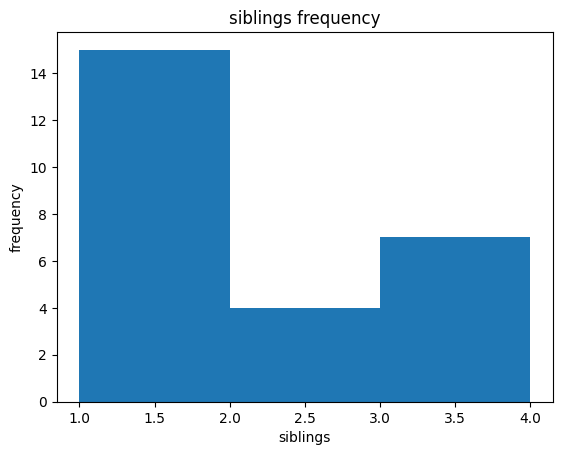

In [6]:
n, bins, patches = plt.hist(x = survey_df["siblings"], bins = "auto")
plt.xlabel("siblings")
plt.ylabel("frequency")
plt.title("siblings frequency")

In [7]:
gender_df = survey_df("pronouns").count()
gender_df
colors = ["blue","pink", "yellow"]
gender_df.plot(kind = "pie", y = "class", colors = colors)
plt.title("gender in CSCI_1070")

TypeError: 'DataFrame' object is not callable

Text(0.5, 1.0, 'experience programming')

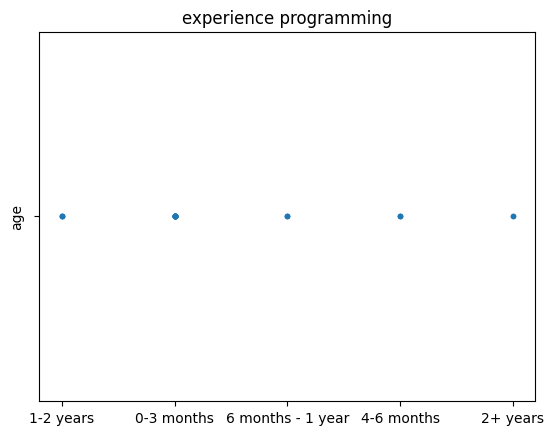

In [24]:
plt.plot(survey_df["experience programming"], survey_df["age"],".")
plt.ylabel("age")
plt.title("experience programming")

Text(0, 0.5, 'frequency')

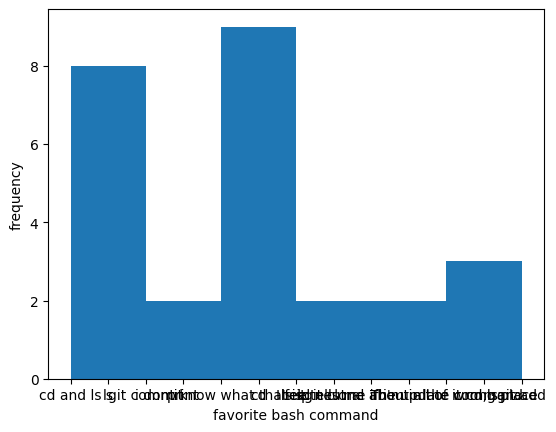

In [25]:
n, bin, patches = plt.hist(x = survey_df["favorite bash command"], bins = "auto")
plt.xlabel("favorite bash command")
plt.ylabel("frequency")

In [8]:
pie_crt = survey_df.groupby("favorite food").count()
colors = ["Green", "Blue", "Red"]
pie_crt.plot(kind = "pie", y = "favorite food", colors = colors)
plt.title("foods")

KeyError: 'favorite food'